<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe%206%20-%20Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Descripcion del problema

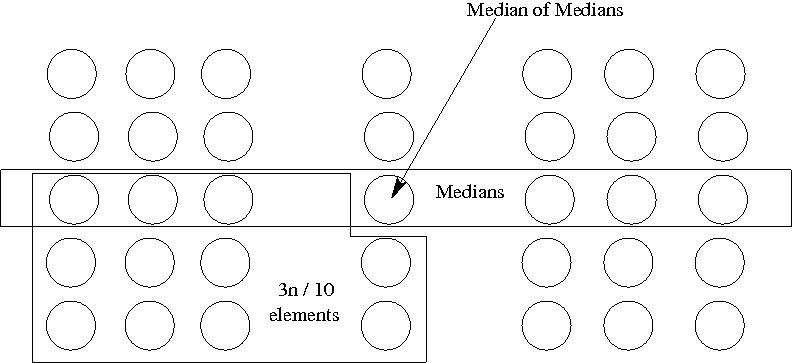

Entrada: Conjunto de números $[a_0, a_1, a_2, ... , a_n]$ y un valor $k$

Salida: $k$-ésimo elemento más pequeño del conjunto.

Los estadísticos de orden son una herramienta importante en el área de la estadística, si bien este tipo de problemas pueda parecer sencilla de implementar, hacerlo de manera eficiente no es tan obvio como puede parecer.

Para esta situación se analizará el algoritmo **Select**.

#2 - Descripción del algoritmo

El algoritmo Select realiza una partición de los datos del conjunto de números para encontrar el $k$-ésimo elemento más pequeño de manera eficiente.

Esta partición se realiza de la siguiente manera:

-Se divide el arreglo en sub-arreglos de 5 elementos cada uno, pudiendo quedar el último subarreglo con menos elementos.

-Busca la mediana de cada sub-arreglo, para esto se aplica insertionSort al momento de ordenar sus datos.

-Se busca la mediana de las medianas encontradas en el paso anterior.

-La mediana encontrada será el pivote que se utilizará para buscar la mitad donde se encuentra el número requerido.

-La función select se llamará recursivamente con las mitades obtenidas hasta obtener el valor.


#2.1 - Código


In [23]:

def insertionSort(arr,cont):
  
    for i in range(1, len(arr)):
  
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j] :
                cont[0]+=1
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

def pivotSelect(arr, izq, der, cont, verbose = True):
    
    auxArr = arr #Arreglo auxiliar para no alterar el orden del arreglo original
    cont[0]+=1
    if der-izq <= 5:     #Si el arreglo tiene 5 o menos elementos, no hace falta dividirlo 
      insertionSort(auxArr,cont) #Luego de ordenar, la mediana será el valor del medio
      if(verbose):
        print("El arreglo tiene 5 elementos o menos")
        print("Mediana:", auxArr[round((der-izq)/2)])
      return auxArr[round((der-izq)/2)]

    medianas = []

    if verbose:
      print("\nSubarreglos:")

    #Se crean n/5 subarreglos 
    for i in range(izq, der, 5):
      subDer = i+4
      cont[0]+=1
      if(subDer > der):
        subDer = der

      subArr = arr[:subDer+1]
      subArr = subArr[i:]
      
      if verbose:
        print(subArr)

      insertionSort(subArr,cont)    
      #Se guarda la mediana en un arreglo de medianas
      medianas.append(subArr[round(len(subArr)/2)])
    if verbose:
      print("\nArreglo de medianas:", medianas)
    #Se llama recursivamente a esta función pasandole el arreglo de medianas
    return pivotSelect(medianas, 0, len(medianas), cont, verbose)

#Función partition para obtener la mitad donde está el valor comparandolo con el pivote
def partition(arr, l, r, cont, verbose = True):

    x = pivotSelect(arr,l,r, cont, verbose)

    i = l
    for j in range(l, r):
        cont[0]+=1
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]

    return i
  
def Select(arr, l, r, k, cont, verbose = True):
  
    if (k > 0 and k <= r - l + 1): #Comprobar validez de la entrada
        cont[0]+=1
  
        index = partition(arr, l, r, cont, verbose) #Se divide el arreglo

        if verbose:
          print("\nArreglo:", arr[l:r+1])
          print("Indice encontrado:",index)

        if (index - l == k - 1): #Si el index es igual al valor ingresado, en esta posición se encuentra el número
            cont[0]+=1
            if verbose:
              print("El indice es igual al limite derecho")

            return arr[index]
  
        #Se llama de manera recursiva a la función select con la mitad identificada
        if (index - l > k - 1):
            cont[0]+=1
            if(verbose):
              print("Mitad que contiene el valor", arr[:index])

            return Select(arr, l, index - 1, k, cont, verbose)

        if(verbose):
              print("Mitad que contiene el valor", arr[index:])

        return Select(arr, index + 1, r, k - index + l - 1, cont, verbose)
        
    else: 
      print("Entrada invalida")
  
verbose = False #opción verbose
cont = [0]

arr = [7,4,9,2,11,1,3,19,8]#Arreglo
k = 3 #k-ésimo elemento a buscar

print("Arreglo recibido:", arr)
print("Entrada:", k)
num = Select(arr, 0, len(arr)-1, k, cont, verbose)

print("\nEl", k,"º elemento más pequeno es", num)
if verbose:
  print("Comparaciones realizadas:",cont[0])

Arreglo recibido: [7, 4, 9, 2, 11, 1, 3, 19, 8]
Entrada: 3

El 3 º elemento más pequeno es 3


#2.2-Ejemplo de ejecución:

Para ejemplificar el funcionamiento del algoritmo utilizaremos el arreglo unidimenional $A=[1,3,2,4,6,5]$ y $k=3$:

$A$ se dividirá en $A_1=[1,3,2,5,6]$ y $A_2 =[4]$.

Se ordenan los sub arreglos resultantes: $A_1 = [1,2,3,5,6]$ y $A_2 = [4]$.

La mediana de cada sub arreglo se almacena en un nuevo arreglo: $B = [3,4]$.

Se saca la mediana de $B$, esta es $4$, este número es el que utilizará la función partition como pivote.

La función select se llamará a si misma de manera recursiva, pero esta vez con $A = [1,3,2,4]$, ya que $k<4$.

En el siguiente llamado a pivotSelect no se dividirá el arreglo ya que su numero de elementos es $<5$, obteniendo como pivote el número $3$.

Luego de aplicar partition con pivote $=3$, el arreglo queda como $A=[1,2,3,4]$.

En la función select, tenemos ahora que el índice que retornó partition (3) es igual a $k$, por lo tanto, el valor en esa posición es el k-ésimo elemento.

#2.3-Ejecución paso a paso:
Utilizando la función verbose = true podemos observar paso a paso la ejecución del algoritmo con $k = 3$:

Arreglo recibido: $[7, 4, 9, 2, 11, 1, 3, 19, 8]$

Entrada: 3

Subarreglos:
$[7, 4, 9, 2, 11]$
$[1, 3, 19, 8]$

Arreglo de medianas: $[7, 8]$

El arreglo tiene 5 elementos o menos

Mediana: 8

Arreglo: $[7, 4, 2, 1, 3, 8, 11, 19, 9]$

Indice encontrado: 5

Mitad que contiene el valor $[7, 4, 2, 1, 3]$

El arreglo tiene 5 elementos o menos

Mediana: 3

Arreglo: $[1, 2, 3, 7, 4]$

Indice encontrado: 3

Mitad que contiene el valor $[1, 2, 3]$

El arreglo tiene 5 elementos o menos

Mediana: 2

Arreglo: $[1, 2, 3]$

Indice encontrado: 2

El indice es igual al limite derecho

El 3 º elemento más pequeno es 3

Comparaciones realizadas: 42

#3-Tiempo de ejecución

Tiempo de ejecución: O(n)

Análisis tiempo de ejecución:

Función PivotSelect: La creación de los subarreglos de 5 elementos requiere recorrer cada elemento del arreglo de largo n, por otro lado, obtenemos las medianas de los subarreglos en tiempo O(1).

Función Partition: Esta funciona de manera similar al partition del quicksort, siendo su peor caso O(n^2) si el pivote es el menor o el mayor elemento del arreglo, pero debido a que en la función PivotSelect elegimos la mediana como pivote, su tiempo de ejecución se reduce a O(n).

#4-Correctitud:

Para analizar la correctitud del algoritmo utilizaremos la inducción matemática:

###**Caso base:**

Si hay un único elemento en el arreglo, este se considerará el más pequeño de manera trivial.

###**Caso general:**

**Función PivotSelect:**


-Se delimitan subarreglos de 5 elementos

-A estos se les aplica insertionSort

-Se indentifica la mediana y esta se almacena en un arreglo de medianas que tendrá $n/5$ elementos

-Se llama de manera recursiva a PivotSelect para identifica la mediana del arreglo de medianas.

-Esta mediana será el pivote de la función partition.

**Función Select:**

-Se indentifica la mitad del arreglo donde se contiene el k-ésimo valor

-Se realizan llamadas recursivas con la mitad identificada hasta que el índice de esta sea igual al valor $k$ ingresado

#5-Experimentos:

#5.1-Comparación con random select:



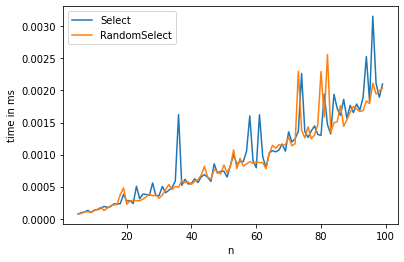

In [14]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def partition(arr, l, r, cont, verbose = True):

    auxArr = arr[l:r+1]
    x = random.choice(auxArr)

    i = l
    for j in range(l, r):
        cont[0]+=1
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]

    return i
  
def RandomSelect(arr, l, r, k, cont, verbose = True):
  
    if (k > 0 and k <= r - l + 1): #Comprobar validez de la entrada
        cont[0]+=1
  
        index = partition(arr, l, r, cont, verbose) #Se divide el arreglo

        if verbose:
          print("\nArreglo:", arr[l:r+1])
          print("Indice encontrado:",index)

        if (index - l == k - 1): #Si el index es igual al valor ingresado, en esta posición se encuentra el número
            cont[0]+=1
            if verbose:
              print("El indice es igual al limite derecho")

            return arr[index]
  
        #Se llama de manera recursiva a la función select con la mitad identificada
        if (index - l > k - 1):
            cont[0]+=1
            if(verbose):
              print("Mitad que contiene el valor", arr[:index])

            return RandomSelect(arr, l, index - 1, k, cont, verbose)

        if(verbose):
              print("Mitad que contiene el valor", arr[index:])

        return RandomSelect(arr, index + 1, r, k - index + l - 1, cont, verbose)
        
    else: 
      print("Entrada invalida")

x=[]; y=[]; x2=[]; y2=[]; cont = [0]

for n in range(5,100):
  nums = []
  nums2 = []

  for i in range(0,n):
    
    a = random.sample(range(1, 1000), n)
    nums.append(a)
    nums2.append(a)
    
  k = random.randrange(1,len(nums)-1)
  t = repeat(setup="from __main__ import Select", stmt=f"Select({nums},{0}, {len(nums)-1},{k}, {cont}, {False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import RandomSelect", stmt=f"RandomSelect({nums2},{0}, {len(nums2)-1},{k}, {cont}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  x2.append(n)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Select","RandomSelect"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

**Análisis de resultados**:

Podemos observar un rendimiento bastante similar entre ambos algoritmos, si bien puede darse por hecho que un pivote aleatorio es poco eficiente, la realidad es que es muy poco probable que este pivote provoque un caso desfavorable.

#5.2-Comparación mejor y peor caso teórico

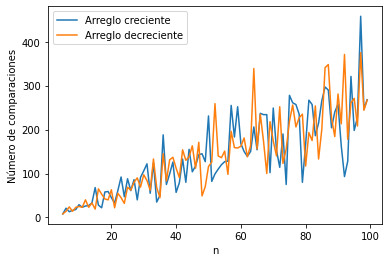

In [22]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,100)] 
y=[]; y2=[]; cont=[0]; cont2=[0]

for n in range(5,100):

  b = [n for n in range(0,n)]
  k = random.randrange(1,len(b)-1)
  counter = Select(b, 0, len(b)-1, k,cont,False)
  y.append(cont[0])
  cont[0] = 0

  c = [n for n in range(n,0,-1)]
  k = random.randrange(1,len(c)-1)
  counter = Select(b, 0, len(c)-1, k,cont2,False)
  y2.append(cont2[0])
  cont2[0] = 0


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Arreglo creciente", "Arreglo decreciente"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

**Análisis de resultados**

La comparación se realiza apelando al mejor y peor caso del insertionSort, puesto que el algoritmo en si no tiene mejor y peor caso, pero como al dividir el arreglo al momento de elegir la mediana se tienen subarreglos de máximo 5 elementos, afecta muy mínimamente si se da o no el mejor o peor caso del insertionSort en el algoritmo select.
